In [1]:
from Scripts.essentials import *
from Scripts.vars import *

Available computational components
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8794204326141034522
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5835325440
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7823549971146600987
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 OEM, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
x_axis = pd.read_excel("Data/RamanFreqTable.xlsx")["Wave"].values

In [151]:
def plot_training_comparison(key, title = "Raw", ylims = [-0.05, 1.05], location = "best"):

    plt.rcParams.update({'font.size': 40})
    plt.rcParams["font.family"] = "Times New Roman"
    metrics = []
    for en in range(n_folds):
        
        hist = np.load("Results/InitialTest_"+title+"_hist_"+str(en)+".npy", allow_pickle = True).item()
        metrics.append(hist[key])
    
    metrics = np.array(metrics)
    

    #plt.plot(metrics.T, alpha = 0.1, color = "blue")
    #plt.fill_between(np.arange(epochs), np.min(metrics, axis = 0), np.max(metrics, axis = 0), color = "blue", alpha = 0.2)
    mean = np.mean(metrics, axis = 0)
    std = np.std(metrics, axis = 0)
    plt.plot(mean, color = "black", label = "Train Mean:" + str(np.round(mean[-1], 2)))
    plt.fill_between(np.arange(epochs), mean - std, mean + std, color = "blue", alpha = 0.2, label = "Train Mean ± Std")
    
    metrics = []
    for en in range(n_folds):
     
        hist = np.load("Results/InitialTest_"+title+"_hist_"+str(en)+".npy", allow_pickle = True).item()
        metrics.append(hist["val_"+key])
    
    metrics = np.array(metrics)
    
    #plt.plot(metrics.T, alpha = 0.1, color = "red")
    
    mean = np.mean(metrics, axis = 0)
    std = np.std(metrics, axis = 0)
    plt.plot(mean, color = "black", ls = "--", label = "Val. Mean:" + str(np.round(mean[-1], 2)))
    plt.fill_between(np.arange(epochs), mean - std, mean + std, color = "red", alpha = 0.2, label = "Validation Mean ± Std")
    
    plt.legend(fontsize = 20, ncol = 1, loc = location)

    plt.ylim(ylims)

    plt.savefig("Images/"+title+"_InitialLearning_"+key+".png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
    plt.show()

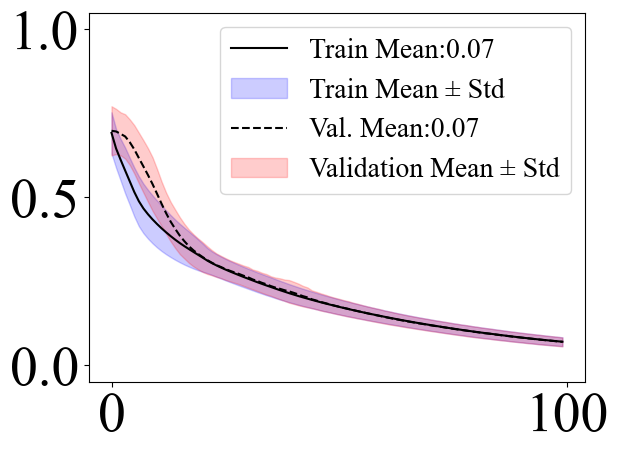

In [152]:
key = "loss"

plot_training_comparison(key, title = "Raw")

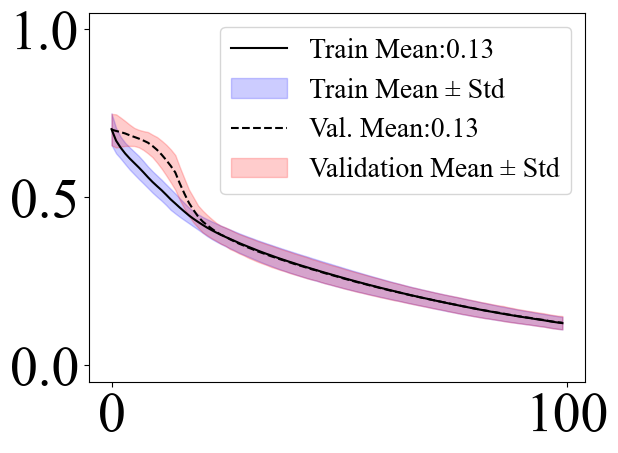

In [153]:
key = "loss"

plot_training_comparison(key, title = "MANUAL")

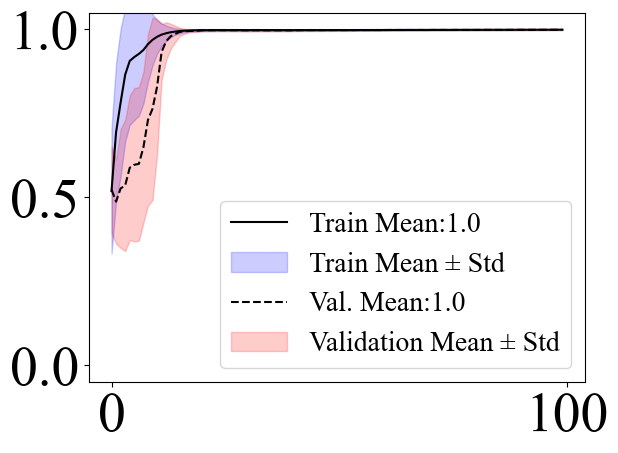

In [156]:
key = "accuracy"

plot_training_comparison(key, title = "Raw", location = "lower right")

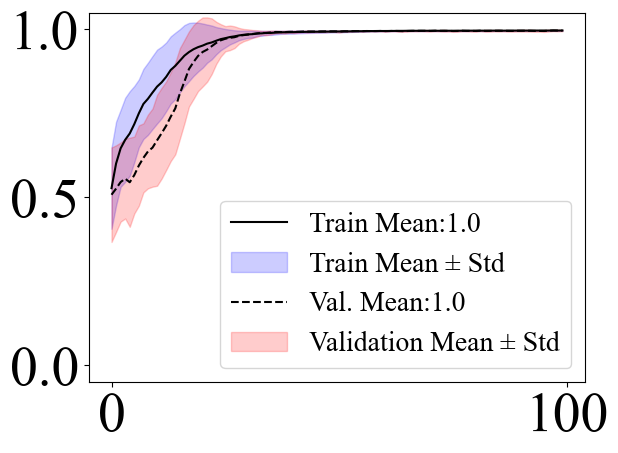

In [158]:
key = "accuracy"

plot_training_comparison(key, title = "MANUAL", location = "lower right")

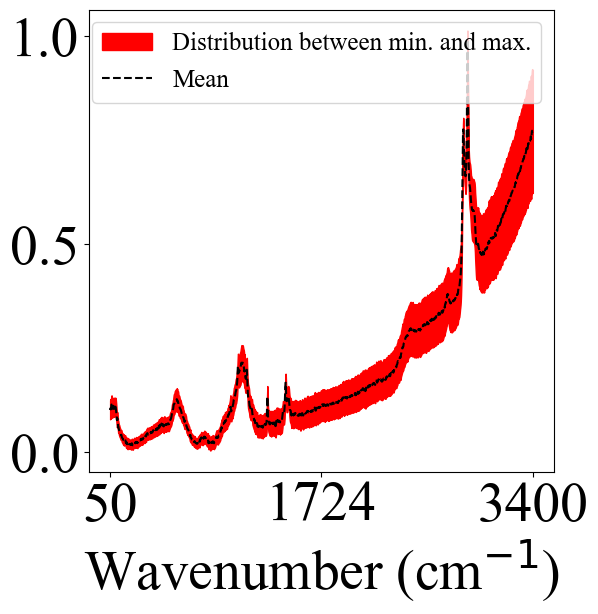

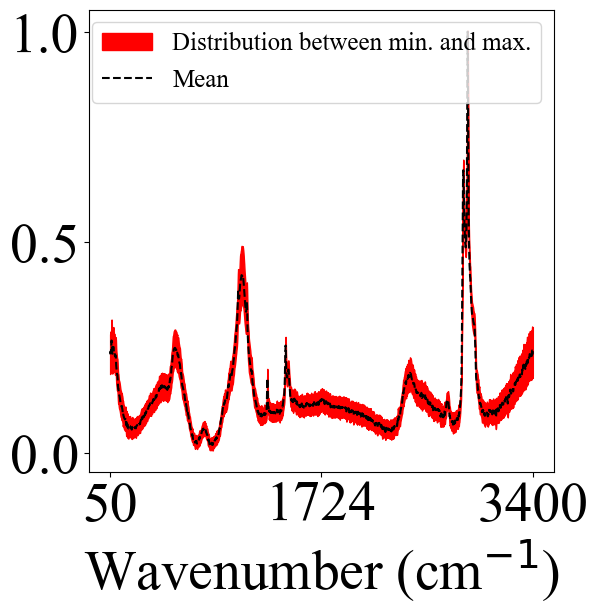

In [132]:
p = "Data/"
title = "Raw"
X = np.concatenate([np.load(p + "train_x.npy"), np.load(p + "val_x.npy"), np.load(p + "test_x.npy")])
y = np.concatenate([np.load(p + "train_y.npy"), np.load(p + "val_y.npy"), np.load(p + "test_y.npy")])

HF_1887 = X[np.argmax(y, axis = 1) == 10] # Get sample spectra
d = HF_1887
min_ = np.min(d, axis = 0)
max_ = np.max(d, axis = 0)
sd = np.std(d, axis = 0)
mean = np.mean(d, axis = 0)


plt.rcParams.update({'font.size': 40})
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize = (6, 6))
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 1, color = "Red", label = "Distribution between min. and max.")
plt.plot(x_axis, mean, linestyle = "--", color = "Black", label = "Mean")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.legend(fontsize = 18)
plt.savefig("Images/("+title+")SolveSpectrumEffect_1887.png", format="png", transparent = True,
                    dpi = 300,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()

# Get the other sample

HF_2070 = X[np.argmax(y, axis = 1) == 17]
d = HF_2070
min_ = np.min(d, axis = 0)
max_ = np.max(d, axis = 0)
sd = np.std(d, axis = 0)
mean = np.mean(d, axis = 0)


plt.figure(figsize = (6, 6))
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 1, color = "Red", label = "Distribution between min. and max.")
plt.plot(x_axis, mean, linestyle = "--", color = "Black", label = "Mean")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.legend(fontsize = 18)
plt.savefig("Images/("+title+")SolveSpectrumEffect_2070.png", format="png", transparent = True,
                    dpi = 300,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()

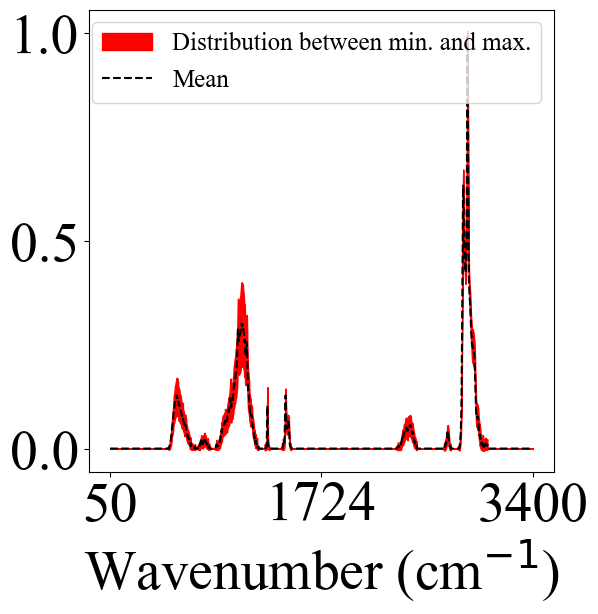

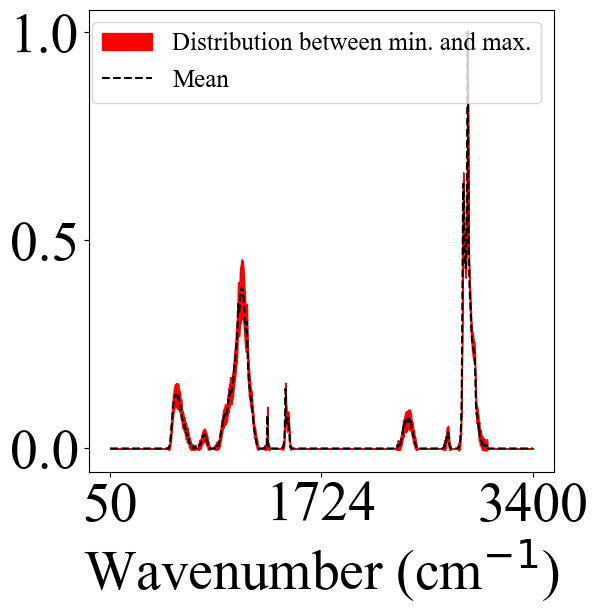

In [134]:
p = "Data/"
title = "MANUAL"
X = np.concatenate([np.load(p + "train_x_MANUAL.npy"), np.load(p + "val_x_MANUAL.npy"), np.load(p + "test_x_MANUAL.npy")])
y = np.concatenate([np.load(p + "train_y.npy"), np.load(p + "val_y.npy"), np.load(p + "test_y.npy")])

HF_1887 = X[np.argmax(y, axis = 1) == 10] # Get sample spectra
d = HF_1887
min_ = np.min(d, axis = 0)
max_ = np.max(d, axis = 0)
sd = np.std(d, axis = 0)
mean = np.mean(d, axis = 0)


plt.rcParams.update({'font.size': 40})
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize = (6, 6))
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 1, color = "Red", label = "Distribution between min. and max.")
plt.plot(x_axis, mean, linestyle = "--", color = "Black", label = "Mean")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.legend(fontsize = 18)
plt.savefig("Images/("+title+")SolveSpectrumEffect_1887.png", format="png", transparent = True,
                    dpi = 300,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()

# Get the other sample

HF_2070 = X[np.argmax(y, axis = 1) == 17]
d = HF_2070
min_ = np.min(d, axis = 0)
max_ = np.max(d, axis = 0)
sd = np.std(d, axis = 0)
mean = np.mean(d, axis = 0)


plt.figure(figsize = (6, 6))
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 1, color = "Red", label = "Distribution between min. and max.")
plt.plot(x_axis, mean, linestyle = "--", color = "Black", label = "Mean")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.legend(fontsize = 18)
plt.savefig("Images/("+title+")SolveSpectrumEffect_2070.png", format="png", transparent = True,
                    dpi = 300,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()

In [188]:
id_dict = {}
lgm_dict = {}

iqr_id = {}
iqr_lgm = {}
for title in ["MANUAL", "RADAR", "RAW"]:

    accs = []
    for en in range(n_folds):
        #hist = np.load("Results/FullTest_"+title+"_hist_"+str(en)+".npy", allow_pickle = True)
        acc = np.load("Results/"+title+"all_accuracies_"+str(en)+".npy", allow_pickle = True)
        accs.append(acc[:, -3:-1])

    accs = np.array(accs)

    mean = np.mean(accs, axis = 0)
    id_dict[title] = mean.T[0]
    lgm_dict[title] = mean.T[1]
    iqr = np.percentile(accs, q = [25, 75], axis = 0)
    iqr_id[title] = iqr.T[0]
    iqr_lgm[title] = iqr.T[1]
    

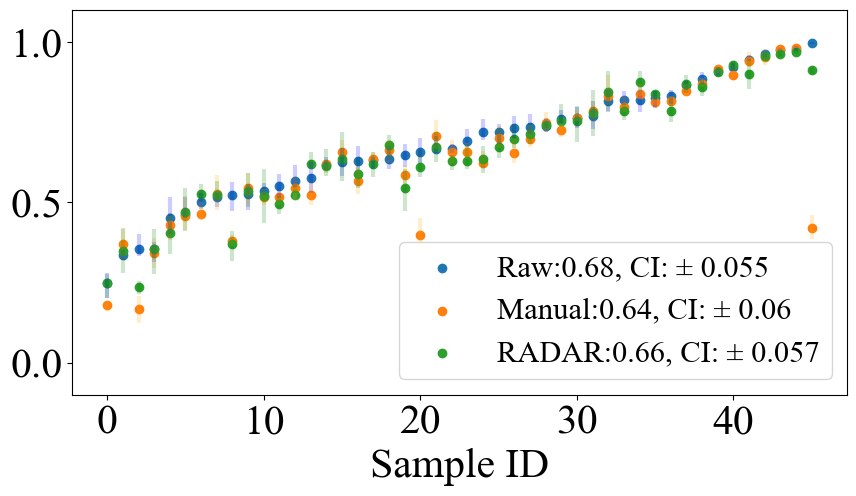

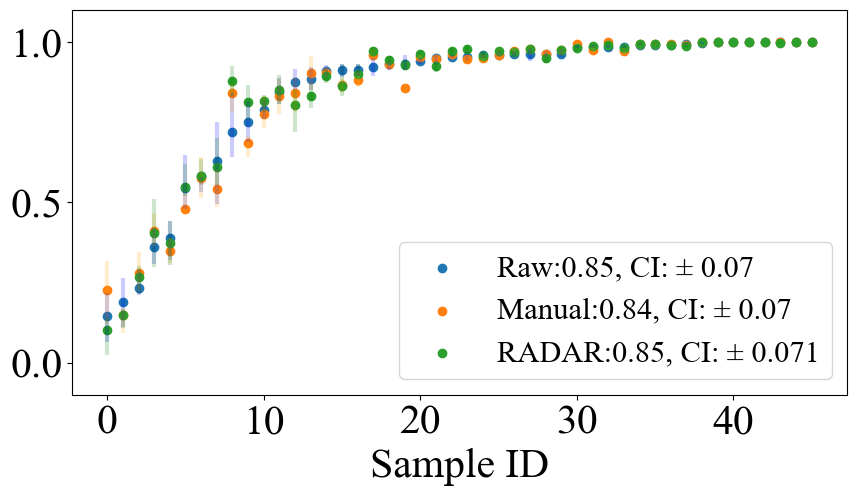

In [189]:
import scipy.stats as stats
################
# ID accuracies
################

plt.rcParams.update({'font.size': 30})
sorting = np.argsort(id_dict["RAW"])
x_range = np.arange(len(id_dict["RAW"]))

plt.figure(figsize = (10, 5))


conf_level = 0.95
d = id_dict["RAW"]
RAW_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
RAW_delta = np.round(np.max(np.abs(np.mean(d) - RAW_cl)), 3)
d = id_dict["MANUAL"]
MANUAL_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
MANUAL_delta = np.round(np.max(np.abs(np.mean(d) - MANUAL_cl)), 3)
d = id_dict["RADAR"]
RADAR_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
RADAR_delta = np.round(np.max(np.abs(np.mean(d) - RADAR_cl)), 3)


plt.scatter(x_range, id_dict["RAW"][sorting], label = "Raw:" + str(np.round(np.mean(id_dict["RAW"]), 2)) + ", CI: ± " + str(RAW_delta))
plt.scatter(x_range, id_dict["MANUAL"][sorting], label = "Manual:" + str(np.round(np.mean(id_dict["MANUAL"]), 2)) + ", CI: ± " + str(MANUAL_delta))
plt.scatter(x_range, id_dict["RADAR"][sorting], label = "RADAR:" + str(np.round(np.mean(id_dict["RADAR"]), 2)) + ", CI: ± " + str(RADAR_delta))

name = "RAW"
plt.vlines(x_range, iqr_id[name].T[0][sorting], iqr_id[name].T[1][sorting], color = "Blue", alpha = 0.2, lw = 3)
name = "MANUAL"
plt.vlines(x_range, iqr_id[name].T[0][sorting], iqr_id[name].T[1][sorting], color = "Orange", alpha = 0.2, lw = 3)
name = "RADAR"
plt.vlines(x_range, iqr_id[name].T[0][sorting], iqr_id[name].T[1][sorting], color = "Green", alpha = 0.2, lw = 3)


plt.ylim([-0.1, 1.1])
plt.legend(fontsize = 22, loc = "lower right")
plt.xlabel("Sample ID")
plt.savefig("Images/Histories/ID_ACC_comparison.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()



################
# LGm accuracies
################

sorting = np.argsort(lgm_dict["RAW"])


d = lgm_dict["RAW"]
RAW_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
RAW_delta = np.round(np.max(np.abs(np.mean(d) - RAW_cl)), 3)
d = lgm_dict["MANUAL"]
MANUAL_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
MANUAL_delta = np.round(np.max(np.abs(np.mean(d) - MANUAL_cl)), 3)
d = lgm_dict["RADAR"]
RADAR_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
RADAR_delta = np.round(np.max(np.abs(np.mean(d) - RADAR_cl)), 3)


plt.figure(figsize = (10, 5))

plt.scatter(x_range, lgm_dict["RAW"][sorting], label = "Raw:" + str(np.round(np.mean(lgm_dict["RAW"]), 2)) + ", CI: ± " + str(RAW_delta))
plt.scatter(x_range, lgm_dict["MANUAL"][sorting], label = "Manual:" + str(np.round(np.mean(lgm_dict["MANUAL"]), 2)) + ", CI: ± " + str(MANUAL_delta))
plt.scatter(x_range, lgm_dict["RADAR"][sorting], label = "RADAR:" + str(np.round(np.mean(lgm_dict["RADAR"]), 2)) + ", CI: ± " + str(RADAR_delta))

name = "RAW"
plt.vlines(x_range, iqr_lgm[name].T[0][sorting], iqr_lgm[name].T[1][sorting], color = "Blue", alpha = 0.2, lw = 3)
name = "MANUAL"
plt.vlines(x_range, iqr_lgm[name].T[0][sorting], iqr_lgm[name].T[1][sorting], color = "Orange", alpha = 0.2, lw = 3)
name = "RADAR"
plt.vlines(x_range, iqr_lgm[name].T[0][sorting], iqr_lgm[name].T[1][sorting], color = "Green", alpha = 0.2, lw = 3)


plt.ylim([-0.1, 1.1])
plt.legend(fontsize = 22, loc = "lower right")
plt.xlabel("Sample ID")
plt.savefig("Images/Histories/LGM_ACC_comparison.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()



In [190]:
id_dict = {}
lgm_dict = {}

iqr_id = {}
iqr_lgm = {}
for title in ["MANUAL", "RAW"]:

    accs = []
    for en in range(n_folds):
        #hist = np.load("Results/FullTest_"+title+"_hist_"+str(en)+".npy", allow_pickle = True)
        acc = np.load("Results/"+title+"all_accuracies_"+str(en)+".npy", allow_pickle = True)
        accs.append(acc[:, -3:-1])

    accs = np.array(accs)

    mean = np.mean(accs, axis = 0)
    iqr = np.percentile(accs, q = [25, 75], axis = 0)
    id_dict[title] = mean.T[0]
    lgm_dict[title] = mean.T[1]

    iqr_id[title] = iqr.T[0]
    iqr_lgm[title] = iqr.T[1]

accs = []
title = "MANUAL"
for en in range(n_folds):
    acc = np.load("Results/"+title+"_BatchEffectReduction_all_accuracies_"+str(en)+".npy")
    accs.append(acc[:, -3:-1])

accs = np.array(accs)

mean = np.mean(accs, axis = 0)
iqr = np.percentile(accs, q = [25, 75], axis = 0)
id_dict[title+"_After"] = mean.T[0]
lgm_dict[title+"_After"] = mean.T[1]

iqr_id[title+"_After"] = iqr.T[0]
iqr_lgm[title+"_After"] = iqr.T[1]

In [191]:
iqr_id["MANUAL"].T.shape

(2, 46)

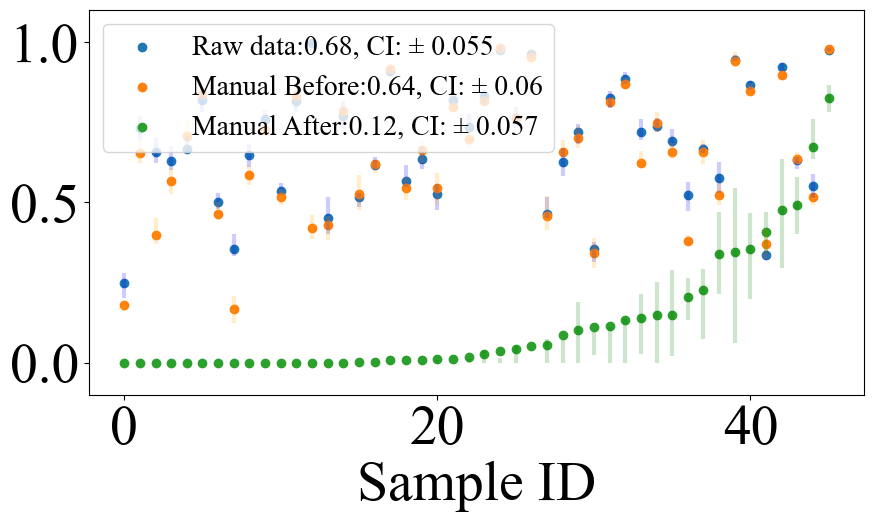

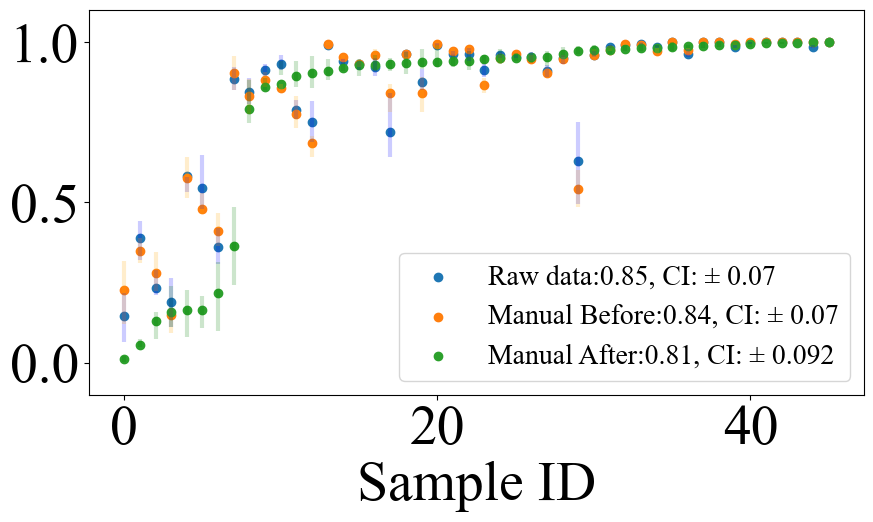

In [192]:
import scipy.stats as stats

plt.rcParams.update({'font.size': 40})
plt.rcParams["font.family"] = "Times New Roman"

################
# ID accuracies
################

sorting = np.argsort(id_dict["MANUAL_After"])
x_range = np.arange(len(id_dict["RAW"]))

plt.figure(figsize = (10, 5))


conf_level = 0.95
d = id_dict["RAW"]
RAW_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
RAW_delta = np.round(np.max(np.abs(np.mean(d) - RAW_cl)), 3)
d = id_dict["MANUAL"]
MANUAL_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
MANUAL_delta = np.round(np.max(np.abs(np.mean(d) - MANUAL_cl)), 3)
d = id_dict["MANUAL_After"]
RADAR_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
RADAR_delta = np.round(np.max(np.abs(np.mean(d) - RADAR_cl)), 3)


plt.scatter(x_range, id_dict["RAW"][sorting], label = "Raw data:" + str(np.round(np.mean(id_dict["RAW"]), 2)) + ", CI: ± " + str(RAW_delta))
plt.scatter(x_range, id_dict["MANUAL"][sorting], label = "Manual Before:" + str(np.round(np.mean(id_dict["MANUAL"]), 2)) + ", CI: ± " + str(MANUAL_delta))
plt.scatter(x_range, id_dict["MANUAL_After"][sorting], label = "Manual After:" + str(np.round(np.mean(id_dict["MANUAL_After"]), 2)) + ", CI: ± " + str(RADAR_delta))

name = "RAW"
plt.vlines(x_range, iqr_id[name].T[0][sorting], iqr_id[name].T[1][sorting], color = "Blue", alpha = 0.2, lw = 3)
name = "MANUAL"
plt.vlines(x_range, iqr_id[name].T[0][sorting], iqr_id[name].T[1][sorting], color = "Orange", alpha = 0.2, lw = 3)
name = "MANUAL_After"
plt.vlines(x_range, iqr_id[name].T[0][sorting], iqr_id[name].T[1][sorting], color = "Green", alpha = 0.2, lw = 3)

plt.ylim([-0.1, 1.1])
plt.legend(fontsize = 20, loc = "upper left")

plt.savefig("Images/Histories/Corrected_ID_ACC_comparison.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.xlabel("Sample ID")
plt.show()



################
# LGm accuracies
################

sorting = np.argsort(lgm_dict["MANUAL_After"])


d = lgm_dict["RAW"]
RAW_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
RAW_delta = np.round(np.max(np.abs(np.mean(d) - RAW_cl)), 3)
d = lgm_dict["MANUAL"]
MANUAL_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
MANUAL_delta = np.round(np.max(np.abs(np.mean(d) - MANUAL_cl)), 3)
d = lgm_dict["MANUAL_After"]
RADAR_cl = stats.t.interval(conf_level, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
RADAR_delta = np.round(np.max(np.abs(np.mean(d) - RADAR_cl)), 3)


plt.figure(figsize = (10, 5))

plt.scatter(x_range, lgm_dict["RAW"][sorting], label = "Raw data:" + str(np.round(np.mean(lgm_dict["RAW"]), 2)) + ", CI: ± " + str(RAW_delta))
plt.scatter(x_range, lgm_dict["MANUAL"][sorting], label = "Manual Before:" + str(np.round(np.mean(lgm_dict["MANUAL"]), 2)) + ", CI: ± " + str(MANUAL_delta))
plt.scatter(x_range, lgm_dict["MANUAL_After"][sorting], label = "Manual After:" + str(np.round(np.mean(lgm_dict["MANUAL_After"]), 2)) + ", CI: ± " + str(RADAR_delta))

name = "RAW"
plt.vlines(x_range, iqr_lgm[name].T[0][sorting], iqr_lgm[name].T[1][sorting], color = "Blue", alpha = 0.2, lw = 3)
name = "MANUAL"
plt.vlines(x_range, iqr_lgm[name].T[0][sorting], iqr_lgm[name].T[1][sorting], color = "Orange", alpha = 0.2, lw = 3)
name = "MANUAL_After"
plt.vlines(x_range, iqr_lgm[name].T[0][sorting], iqr_lgm[name].T[1][sorting], color = "Green", alpha = 0.2, lw = 3)

plt.ylim([-0.1, 1.1])
plt.legend(fontsize = 20, loc = "lower right")
plt.xlabel("Sample ID")
plt.savefig("Images/Histories/Corrected_LGM_ACC_comparison.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()



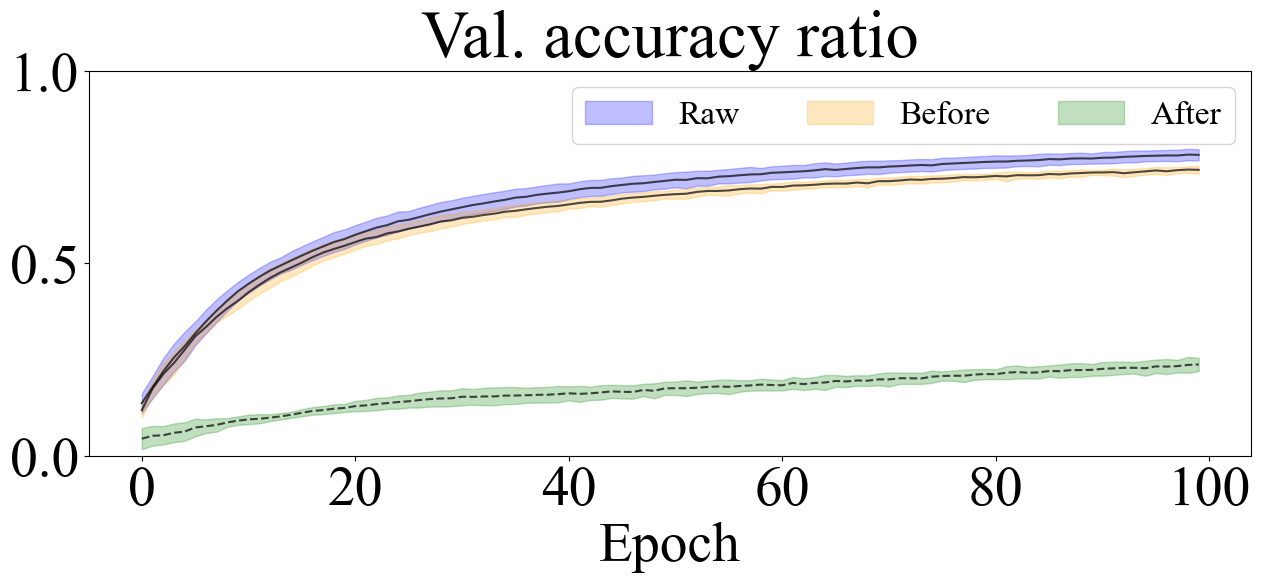

In [142]:

key = "accuracy"
plt.figure(figsize = (15, 5))

title = "RAW"
lines = []
color = "blue"
for en in range(n_folds):
    hist = np.load("Results/FullTest_"+title+"_hist_"+str(en)+".npy", allow_pickle = True).item()
    lines.append(np.array(hist["val_ID_"+key])/np.array(hist["val_LGm_"+key]))
    #plt.plot(lines[-1], color = color, alpha = 0.2, ls = "--")

mean = np.mean(lines, axis = 0)
std = np.std(lines, axis = 0)

plt.plot(mean, color = "black", alpha = 0.7)
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color = color, alpha = 0.25, label = "Raw")


title = "MANUAL"


lines = []
color = "orange"
for en in range(n_folds):
    hist = np.load("Results/FullTest_"+title+"_hist_"+str(en)+".npy", allow_pickle = True).item()
    lines.append(np.array(hist["val_ID_"+key])/np.array(hist["val_LGm_"+key]))
    #plt.plot(lines[-1], color = color, alpha = 0.2, ls = "--")

mean = np.mean(lines, axis = 0)
std = np.std(lines, axis = 0)

plt.plot(mean, color = "black", alpha = 0.7)
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color = color, alpha = 0.25, label = "Before")


color = "green"
lines = []

for en in range(n_folds):
    hist = np.load("Results/BatchEffectReduction_"+title+"_hist_"+str(en)+".npy", allow_pickle = True).item()
    lines.append(np.array(hist["val_ID_"+key])/np.array(hist["val_LGm_"+key]))
    #plt.plot(lines[-1], color = color, alpha = 0.2, ls = "--")

mean = np.mean(lines, axis = 0)
std = np.std(lines, axis = 0)

plt.plot(mean, color = "black", alpha = 0.7, ls = "--")
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color = color, alpha = 0.25, label = "After")
plt.xlabel("Epoch")
plt.legend(ncol = 3, fontsize = 24)
plt.title("Val. accuracy ratio")
plt.ylim([0, 1])
plt.savefig("Images/Histories/Ratio_acc.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()

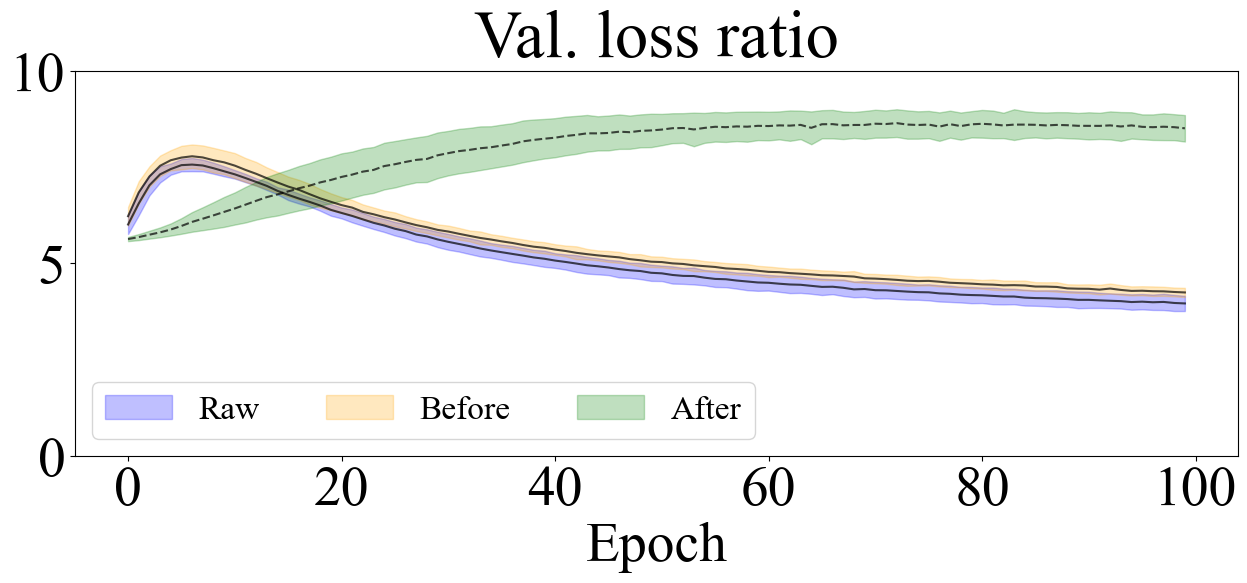

In [141]:

key = "loss"
plt.figure(figsize = (15, 5))

title = "RAW"
lines = []
color = "blue"
for en in range(n_folds):
    hist = np.load("Results/FullTest_"+title+"_hist_"+str(en)+".npy", allow_pickle = True).item()
    lines.append(np.array(hist["val_ID_"+key])/np.array(hist["val_LGm_"+key]))
    #plt.plot(lines[-1], color = color, alpha = 0.2, ls = "--")

mean = np.mean(lines, axis = 0)
std = np.std(lines, axis = 0)

plt.plot(mean, color = "black", alpha = 0.7)
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color = color, alpha = 0.25, label = "Raw")


title = "MANUAL"


lines = []
color = "orange"
for en in range(n_folds):
    hist = np.load("Results/FullTest_"+title+"_hist_"+str(en)+".npy", allow_pickle = True).item()
    lines.append(np.array(hist["val_ID_"+key])/np.array(hist["val_LGm_"+key]))
    #plt.plot(lines[-1], color = color, alpha = 0.2, ls = "--")

mean = np.mean(lines, axis = 0)
std = np.std(lines, axis = 0)

plt.plot(mean, color = "black", alpha = 0.7)
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color = color, alpha = 0.25, label = "Before")


color = "green"
lines = []

for en in range(n_folds):
    hist = np.load("Results/BatchEffectReduction_"+title+"_hist_"+str(en)+".npy", allow_pickle = True).item()
    lines.append(np.array(hist["val_ID_"+key])/np.array(hist["val_LGm_"+key]))
    #plt.plot(lines[-1], color = color, alpha = 0.2, ls = "--")

mean = np.mean(lines, axis = 0)
std = np.std(lines, axis = 0)

plt.plot(mean, color = "black", alpha = 0.7, ls = "--")
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, color = color, alpha = 0.25, label = "After")
plt.xlabel("Epoch")
plt.legend(ncol = 3, fontsize = 24)
plt.title("Val. loss ratio")
plt.ylim([0, 10])
plt.savefig("Images/Histories/Ratio_loss.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()


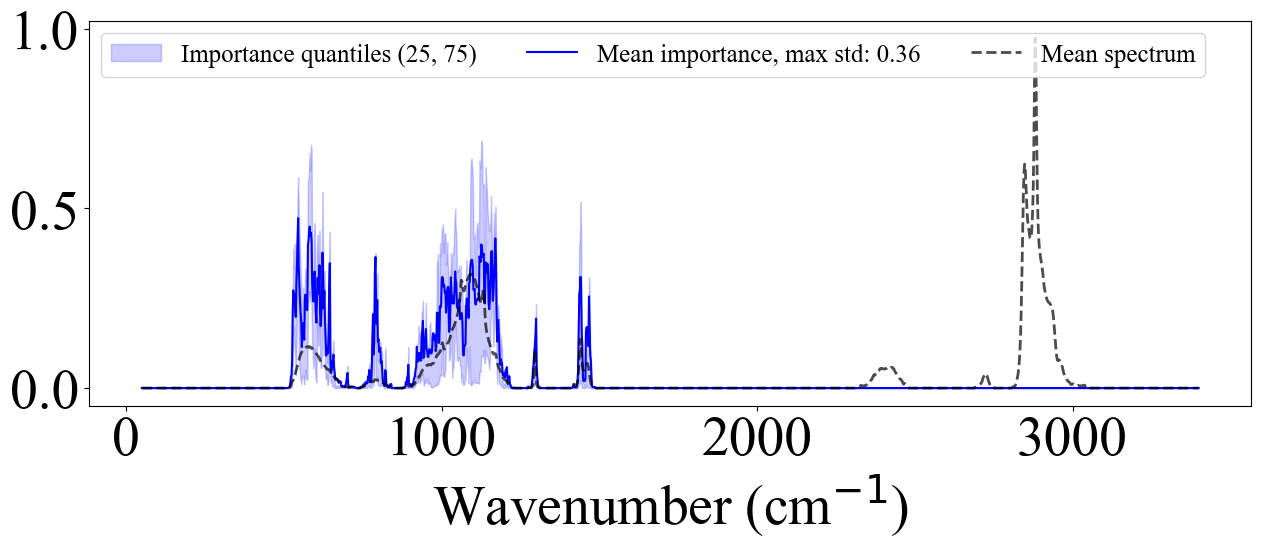

In [240]:
p = "Data/"
title = "MANUAL"

X_all = np.concatenate([np.load(p + "train_x_"+title+".npy"), np.load(p + "val_x_"+title+".npy"), np.load(p + "test_x_"+title+".npy")])
lgm_all = np.concatenate([np.load(p + "train_lgm.npy"), np.load(p + "val_lgm.npy"), np.load(p + "test_lgm.npy")])
y_all = np.concatenate([np.load(p + "train_y_46.npy"), np.load(p + "val_y_46.npy"), np.load(p + "test_y_46.npy")])
lgm_all = np.argmax(lgm_all, axis = -1)
y_all = np.argmax(y_all, axis = -1)
lgm_all = np.where(lgm_all > 2, 0, 1)

x_axis = pd.read_excel("Data/RamanFreqTable.xlsx")["Wave"].values

# Learned feature importances
plt.rcParams.update({'font.size': 40})
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize= (15, 5))
threshold = 0.01
importances = []
for en in range(n_folds):

    imp = np.load("Results/Features/"+title+"_MutantVsWildtype_importance"+str(en)+".npy")
    importances.append(imp)
    most_important = np.where(imp > threshold)[0]

    #plt.plot(x_axis, np.mean(X_all, axis = 0) + en + 1, color = "Black", ls = "--")
    #plt.plot(x_axis, imp + en + 1, alpha = 0.7, label = "Fold" + str(en+1))
    
    #plt.scatter(x_axis[most_important], [np.mean(train_x, axis = 0)[most_important]], alpha = 0.5, label = "Fold " + str(en + 1))
    #break
r = [25, 75]
iqr = np.percentile(importances, q = r, axis = 0)


conf_level = 0.75

cl = stats.t.interval(conf_level, df=len(importances)-1, loc=np.mean(importances, axis = 0),
                      scale=np.std(importances, ddof=1, axis = 0) / np.sqrt(len(importances)))
delta = np.round(np.max(np.abs(np.mean(importances) - cl), axis = 0), 3)
cl = np.round(cl, 2)


mean = np.mean(importances, axis = 0)
std = np.std(importances, axis = 0)
plt.fill_between(x_axis, iqr[0], iqr[1], color = "blue", alpha = 0.2, label="Importance quantiles ("+str(r[0])+", "+str(r[1])+")")
#plt.fill_between(x_axis, mean - cl[0], mean + cl[1], color = "blue", alpha = 0.25, label="Importance CI")
#plt.plot(x_axis, mean, color = "blue", label = "Mean importance, CI: ± " + str(np.round(np.max(delta), 2)), alpha = 1)
plt.plot(x_axis, mean, color = "blue", label = "Mean importance, max std: " + str(np.round(np.max(std), 2)), alpha = 1)


plt.plot(x_axis, np.mean(X_all, axis = 0), color = "Black", alpha = 0.7, label = "Mean spectrum", lw = 2, ls = "--")
plt.legend(fontsize = 18, ncol = 3, loc = "upper left")
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.yticks([0, 0.5, 1.0])

plt.savefig("Images/Features/(MANUAL)BiasFeatureImportanceIndices.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()

In [246]:
title = "RAW"
hists = []
for en in range(10):
    df = np.load("Results/"+title+"all_accuracies_"+str(en)+".npy")

    hists.append(df)

hists = np.array(hists)

hists = np.mean(hists, axis = 0)
hists[:, [2, -1]] = np.round(hists[:, [2, -1]])
hists = np.round(hists, 2)
print(hists)



[[    0.35     0.95  6461.       0.36     0.95   718.  ]
 [    0.96     0.15  2995.       0.96     0.15   333.  ]
 [    0.82     1.    6501.       0.82     1.     722.  ]
 [    0.51     0.96  3653.       0.52     0.96   406.  ]
 [    0.83     0.99  2423.       0.82     0.99   269.  ]
 [    0.54     1.    5621.       0.54     1.     625.  ]
 [    0.97     1.   12926.       0.98     1.    1436.  ]
 [    0.92     0.99  6108.       0.92     0.99   679.  ]
 [    0.45     0.96  3627.       0.45     0.96   403.  ]
 [    1.       1.    5200.       1.       0.99   578.  ]
 [    0.94     0.88  3203.       0.94     0.88   356.  ]
 [    0.53     0.95  9030.       0.52     0.95  1003.  ]
 [    0.55     0.39  9621.       0.55     0.39  1069.  ]
 [    0.57     0.93  4406.       0.57     0.93   490.  ]
 [    0.46     0.79  3542.       0.46     0.79   394.  ]
 [    0.66     0.99  3231.       0.65     0.99   359.  ]
 [    0.35     0.94  3624.       0.35     0.94   403.  ]
 [    0.64     0.91  3842.     

In [254]:
# Convert Training tables to latex

# Save the metrics in a dataframe
header = ["Train Accuracy", "Train IDH1 Accuracy", "Train Size",
          "Validation Accuracy", "Validation IDH1 Accuracy", "Validation Size"]

#sample_dict = 
#df = pd.DataFrame.from_dict(sample_dict, columns = header,
#                                        orient = "index")

df = pd.DataFrame(hists, columns = header)
# Round them to two decimals
#df = df.round(decimals = 2)

# Cast the number of spectra to integer, looks nicer than the decimal form with .0 after each number
df["Train Size"] = df["Train Size"].apply(lambda x: int(x))
df["Validation Size"] = df["Validation Size"].apply(lambda x: int(x))

# Styling for convertion into latex format
df.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    {'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'},
], overwrite=False)

latex = df.style.format(decimal=',', thousands='.', precision=2).to_latex(clines="all;data",  column_format="|l|l|", environment="longtable",)
latex = latex.replace(r"\cline{1-7}", r"\hline")
# Print the latex table, can be copied into the editor
print(latex)

\begin{longtable}{|l|l|}
 & Train Accuracy & Train IDH1 Accuracy & Train Size & Validation Accuracy & Validation IDH1 Accuracy & Validation Size \\
\endfirsthead
 & Train Accuracy & Train IDH1 Accuracy & Train Size & Validation Accuracy & Validation IDH1 Accuracy & Validation Size \\
\endhead
\multicolumn{7}{r}{Continued on next page} \\
\endfoot
\endlastfoot
0 & 0,35 & 0,95 & 6.461 & 0,36 & 0,95 & 718 \\
\hline
1 & 0,96 & 0,15 & 2.995 & 0,96 & 0,15 & 333 \\
\hline
2 & 0,82 & 1,00 & 6.501 & 0,82 & 1,00 & 722 \\
\hline
3 & 0,51 & 0,96 & 3.653 & 0,52 & 0,96 & 406 \\
\hline
4 & 0,83 & 0,99 & 2.423 & 0,82 & 0,99 & 269 \\
\hline
5 & 0,54 & 1,00 & 5.621 & 0,54 & 1,00 & 625 \\
\hline
6 & 0,97 & 1,00 & 12.926 & 0,98 & 1,00 & 1.436 \\
\hline
7 & 0,92 & 0,99 & 6.108 & 0,92 & 0,99 & 679 \\
\hline
8 & 0,45 & 0,96 & 3.627 & 0,45 & 0,96 & 403 \\
\hline
9 & 1,00 & 1,00 & 5.200 & 1,00 & 0,99 & 578 \\
\hline
10 & 0,94 & 0,88 & 3.203 & 0,94 & 0,88 & 356 \\
\hline
11 & 0,53 & 0,95 & 9.030 & 0,52 & 0,95 &

In [255]:
title = "MANUAL"
hists = []
for en in range(10):
    df = np.load("Results/"+title+"all_accuracies_"+str(en)+".npy")

    hists.append(df)

hists = np.array(hists)

hists = np.mean(hists, axis = 0)
hists[:, [2, -1]] = np.round(hists[:, [2, -1]])
hists = np.round(hists, 2)
print(hists)


[[    0.34     0.96  6461.       0.34     0.96   718.  ]
 [    0.95     0.22  2995.       0.95     0.22   333.  ]
 [    0.8      1.    6501.       0.8      1.     722.  ]
 [    0.53     0.97  3653.       0.52     0.97   406.  ]
 [    0.84     0.99  2423.       0.83     0.99   269.  ]
 [    0.52     1.    5621.       0.52     1.     625.  ]
 [    0.98     1.   12926.       0.98     1.    1436.  ]
 [    0.9      0.99  6108.       0.9      0.99   679.  ]
 [    0.44     0.96  3627.       0.43     0.96   403.  ]
 [    0.42     0.99  5200.       0.42     0.99   578.  ]
 [    0.94     0.9   3203.       0.94     0.9    356.  ]
 [    0.38     0.94  9030.       0.38     0.95  1003.  ]
 [    0.52     0.35  9621.       0.52     0.35  1069.  ]
 [    0.54     0.94  4406.       0.54     0.93   490.  ]
 [    0.46     0.78  3542.       0.46     0.77   394.  ]
 [    0.59     1.    3231.       0.58     0.99   359.  ]
 [    0.17     0.95  3624.       0.17     0.95   403.  ]
 [    0.66     0.87  3842.     

In [256]:
# Convert Training tables to latex

# Save the metrics in a dataframe
header = ["Train Accuracy", "Train IDH1 Accuracy", "Train Size",
          "Validation Accuracy", "Validation IDH1 Accuracy", "Validation Size"]

#sample_dict = 
#df = pd.DataFrame.from_dict(sample_dict, columns = header,
#                                        orient = "index")

df = pd.DataFrame(hists, columns = header)
# Round them to two decimals
#df = df.round(decimals = 2)

# Cast the number of spectra to integer, looks nicer than the decimal form with .0 after each number
df["Train Size"] = df["Train Size"].apply(lambda x: int(x))
df["Validation Size"] = df["Validation Size"].apply(lambda x: int(x))

# Styling for convertion into latex format
df.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    {'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'},
], overwrite=False)

latex = df.style.format(decimal=',', thousands='.', precision=2).to_latex(clines="all;data",  column_format="|l|l|", environment="longtable",)
latex = latex.replace(r"\cline{1-7}", r"\hline")
# Print the latex table, can be copied into the editor
print(latex)

\begin{longtable}{|l|l|}
 & Train Accuracy & Train IDH1 Accuracy & Train Size & Validation Accuracy & Validation IDH1 Accuracy & Validation Size \\
\endfirsthead
 & Train Accuracy & Train IDH1 Accuracy & Train Size & Validation Accuracy & Validation IDH1 Accuracy & Validation Size \\
\endhead
\multicolumn{7}{r}{Continued on next page} \\
\endfoot
\endlastfoot
0 & 0,34 & 0,96 & 6.461 & 0,34 & 0,96 & 718 \\
\hline
1 & 0,95 & 0,22 & 2.995 & 0,95 & 0,22 & 333 \\
\hline
2 & 0,80 & 1,00 & 6.501 & 0,80 & 1,00 & 722 \\
\hline
3 & 0,53 & 0,97 & 3.653 & 0,52 & 0,97 & 406 \\
\hline
4 & 0,84 & 0,99 & 2.423 & 0,83 & 0,99 & 269 \\
\hline
5 & 0,52 & 1,00 & 5.621 & 0,52 & 1,00 & 625 \\
\hline
6 & 0,98 & 1,00 & 12.926 & 0,98 & 1,00 & 1.436 \\
\hline
7 & 0,90 & 0,99 & 6.108 & 0,90 & 0,99 & 679 \\
\hline
8 & 0,44 & 0,96 & 3.627 & 0,43 & 0,96 & 403 \\
\hline
9 & 0,42 & 0,99 & 5.200 & 0,42 & 0,99 & 578 \\
\hline
10 & 0,94 & 0,90 & 3.203 & 0,94 & 0,90 & 356 \\
\hline
11 & 0,38 & 0,94 & 9.030 & 0,38 & 0,95 &

In [257]:
title = "RADAR"
hists = []
for en in range(10):
    df = np.load("Results/"+title+"all_accuracies_"+str(en)+".npy")

    hists.append(df)

hists = np.array(hists)

hists = np.mean(hists, axis = 0)
hists[:, [2, -1]] = np.round(hists[:, [2, -1]])
hists = np.round(hists, 2)
print(hists)


[[    0.35     0.97  6461.       0.36     0.97   718.  ]
 [    0.95     0.1   2995.       0.95     0.1    333.  ]
 [    0.78     1.    6501.       0.78     1.     722.  ]
 [    0.52     0.97  3653.       0.52     0.97   406.  ]
 [    0.85     0.99  2423.       0.85     0.99   269.  ]
 [    0.52     1.    5621.       0.52     1.     625.  ]
 [    0.96     1.   12926.       0.96     1.    1436.  ]
 [    0.93     1.    6108.       0.93     0.99   679.  ]
 [    0.41     0.97  3627.       0.41     0.97   403.  ]
 [    0.91     0.98  5200.       0.91     0.99   578.  ]
 [    0.91     0.83  3203.       0.9      0.83   356.  ]
 [    0.37     0.92  9030.       0.37     0.92  1003.  ]
 [    0.49     0.37  9621.       0.5      0.37  1069.  ]
 [    0.52     0.94  4406.       0.52     0.94   490.  ]
 [    0.47     0.82  3542.       0.47     0.81   394.  ]
 [    0.55     0.99  3231.       0.54     0.99   359.  ]
 [    0.23     0.96  3624.       0.24     0.96   403.  ]
 [    0.68     0.86  3842.     

In [258]:
# Convert Training tables to latex

# Save the metrics in a dataframe
header = ["Train Accuracy", "Train IDH1 Accuracy", "Train Size",
          "Validation Accuracy", "Validation IDH1 Accuracy", "Validation Size"]

#sample_dict = 
#df = pd.DataFrame.from_dict(sample_dict, columns = header,
#                                        orient = "index")

df = pd.DataFrame(hists, columns = header)
# Round them to two decimals
#df = df.round(decimals = 2)

# Cast the number of spectra to integer, looks nicer than the decimal form with .0 after each number
df["Train Size"] = df["Train Size"].apply(lambda x: int(x))
df["Validation Size"] = df["Validation Size"].apply(lambda x: int(x))

# Styling for convertion into latex format
df.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    {'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'},
], overwrite=False)

latex = df.style.format(decimal=',', thousands='.', precision=2).to_latex(clines="all;data",  column_format="|l|l|", environment="longtable",)
latex = latex.replace(r"\cline{1-7}", r"\hline")
# Print the latex table, can be copied into the editor
print(latex)

\begin{longtable}{|l|l|}
 & Train Accuracy & Train IDH1 Accuracy & Train Size & Validation Accuracy & Validation IDH1 Accuracy & Validation Size \\
\endfirsthead
 & Train Accuracy & Train IDH1 Accuracy & Train Size & Validation Accuracy & Validation IDH1 Accuracy & Validation Size \\
\endhead
\multicolumn{7}{r}{Continued on next page} \\
\endfoot
\endlastfoot
0 & 0,35 & 0,97 & 6.461 & 0,36 & 0,97 & 718 \\
\hline
1 & 0,95 & 0,10 & 2.995 & 0,95 & 0,10 & 333 \\
\hline
2 & 0,78 & 1,00 & 6.501 & 0,78 & 1,00 & 722 \\
\hline
3 & 0,52 & 0,97 & 3.653 & 0,52 & 0,97 & 406 \\
\hline
4 & 0,85 & 0,99 & 2.423 & 0,85 & 0,99 & 269 \\
\hline
5 & 0,52 & 1,00 & 5.621 & 0,52 & 1,00 & 625 \\
\hline
6 & 0,96 & 1,00 & 12.926 & 0,96 & 1,00 & 1.436 \\
\hline
7 & 0,93 & 1,00 & 6.108 & 0,93 & 0,99 & 679 \\
\hline
8 & 0,41 & 0,97 & 3.627 & 0,41 & 0,97 & 403 \\
\hline
9 & 0,91 & 0,98 & 5.200 & 0,91 & 0,99 & 578 \\
\hline
10 & 0,91 & 0,83 & 3.203 & 0,90 & 0,83 & 356 \\
\hline
11 & 0,37 & 0,92 & 9.030 & 0,37 & 0,92 &